<a href="https://colab.research.google.com/github/hyeonmin2/Bin-Navigation/blob/main/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# 첫 번째 CSV 파일 읽기
from google.colab import files
uploaded = files.upload()

df1 = pd.read_csv(io.StringIO(uploaded['incheon.csv'].decode('utf-8')),na_values=' ')
df1.head()
df1.tail()

Saving incheon.csv to incheon.csv


,date,K-pm25,K-pm10,K-o3,K-no2,K-so2,K-co
3347,2014-03-28,NaN,84.0,33.0,68.0,16.0,9.0
3348,2014-03-29,NaN,63.0,50.0,42.0,12.0,7.0
3349,2014-03-30,NaN,59.0,36.0,79.0,31.0,11.0
3350,2014-03-31,NaN,74.0,40.0,98.0,39.0,12.0
3351,2013-12-31,NaN,NaN,24.0,37.0,25.0,10.0


In [3]:
uploaded = files.upload()

# 두 번째 CSV 파일 읽기
df2 = pd.read_csv(io.StringIO(uploaded['beijing.csv'].decode('utf-8')),na_values=' ')
df2.head()
df2.tail()

Saving beijing.csv to beijing.csv


,date,C-pm25,C-pm10,C-o3,C-no2,C-so2,C-co
3410,2018-12-31,NaN,46.0,17.0,20.0,5.0,9.0
3411,2017-09-10,NaN,23.0,35.0,19.0,1.0,3.0
3412,2014-12-31,NaN,67.0,19.0,29.0,16.0,11.0
3413,2013-12-31,NaN,85.0,20.0,30.0,14.0,20.0
3414,2016-01-02,NaN,NaN,18.0,32.0,10.0,15.0


In [4]:

# 두 데이터프레임을 병합
merged_df = pd.merge(df1, df2, on='date')

# 병합된 데이터프레임을 새로운 CSV 파일로 저장
merged_df.head()
merged_df.tail()

,date,K-pm25,K-pm10,K-o3,K-no2,K-so2,K-co,C-pm25,C-pm10,C-o3,C-no2,C-so2,C-co
3347,2014-03-28,NaN,84.0,33.0,68.0,16.0,9.0,207.0,68.0,43.0,15.0,3.0,16.0
3348,2014-03-29,NaN,63.0,50.0,42.0,12.0,7.0,103.0,59.0,43.0,21.0,3.0,10.0
3349,2014-03-30,NaN,59.0,36.0,79.0,31.0,11.0,93.0,117.0,39.0,34.0,18.0,22.0
3350,2014-03-31,NaN,74.0,40.0,98.0,39.0,12.0,206.0,84.0,57.0,32.0,8.0,9.0
3351,2013-12-31,NaN,NaN,24.0,37.0,25.0,10.0,NaN,85.0,20.0,30.0,14.0,20.0


In [5]:
#데이터에 NaN이 있는 경우 그 행을 제외
filled_df = merged_df.dropna()

filled_df.head()
filled_df.tail()

,date,K-pm25,K-pm10,K-o3,K-no2,K-so2,K-co,C-pm25,C-pm10,C-o3,C-no2,C-so2,C-co
2970,2015-03-27,113.0,63.0,49.0,55.0,24.0,9.0,174.0,223.0,35.0,16.0,5.0,4.0
2971,2015-03-28,113.0,61.0,39.0,40.0,19.0,8.0,134.0,196.0,44.0,37.0,10.0,10.0
2972,2015-03-29,116.0,112.0,52.0,64.0,25.0,13.0,165.0,190.0,62.0,36.0,15.0,13.0
2973,2015-03-30,149.0,97.0,35.0,73.0,15.0,12.0,207.0,96.0,31.0,27.0,9.0,19.0
2974,2015-03-31,162.0,61.0,31.0,45.0,10.0,9.0,196.0,55.0,31.0,26.0,2.0,6.0


<ipython-input-6-e24eda270742>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = filled_df.corr()


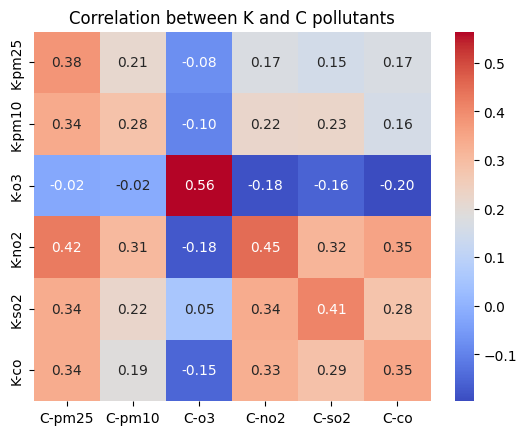

In [6]:
#한국과 중국의 히트맵 분석
correlation = filled_df.corr()
sns.heatmap(correlation.iloc[:6, 6:], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between K and C pollutants')
plt.show()

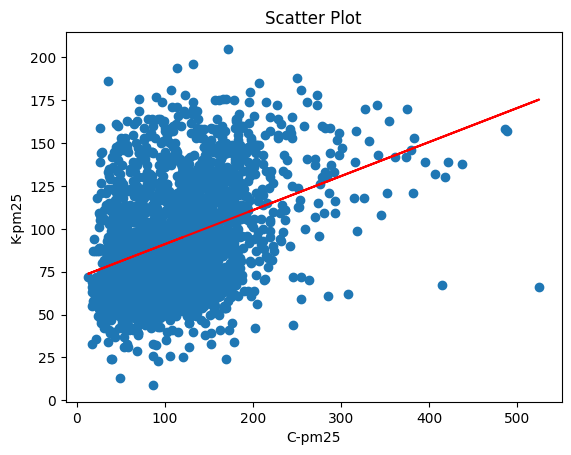

In [19]:
#한국과 중국의 산점도와 회귀선 분석
from sklearn.linear_model import LinearRegression
import numpy as np

x_data = filled_df["C-pm25"].tolist()
y_data = filled_df["K-pm25"].tolist()

x = np.array(x_data)
y = np.array(y_data)

regression_model = LinearRegression()
regression_model.fit(x.reshape(-1, 1), y)

plt.scatter(x, y)
plt.plot(x, regression_model.predict(x.reshape(-1, 1)), color='r', label='Regression Line')
plt.xlabel("C-pm25")
plt.ylabel("K-pm25")
plt.title("Scatter Plot")
plt.show()